In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import timeit
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# import Requests Ligbrary
import requests as req
# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

51.02622262608941 -25.07349259123788
-10.72758286163885 15.444178056491808
48.07999912645411 -33.937763039377415
37.78705178384115 -175.76080162325061
-59.27064686041004 -127.3586375632793
-75.48970438101802 60.73053537696029
-19.50718345458438 -40.31062624718925
-58.21736643771921 -127.26386078476031
7.670927933332607 -34.69454363045648
-23.474491751599587 126.63085629481031
-66.50711441725625 -119.79207439221008
-82.78222950270279 -26.331803292720707
-80.81912933739078 -94.06423293430277
18.253464315025084 -76.62651684150998
52.8806777604394 -107.08389999895692
-68.52981232832073 -73.39684094221776
-67.69245696260646 53.24316345848516
9.768380202198841 -88.85070810486108
-76.02337650908069 169.56256679411513
37.59439572265963 147.15391548682294
-66.73054829133419 -170.3079743122866
62.800691885115555 -16.723484373417108
-28.114956290865884 -119.56908895161594
-63.341428052603895 43.12485031577833
-45.20808832197038 -25.88434815667364
78.9754991505136 22.07526991441327
-61.96826620807

In [5]:
# use citipy module to determine city based on lats and longs
from citipy import citipy

#Import the Requests Library
import requests

# Import the API key
from config import weather_api_key

# import the Time Library and datetime module from dateime library
import time
from datetime import datetime

In [6]:
# starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [7]:
# create a list for holding the cities
cities= []

# identify the nearest city for each lat and long combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if the city is unique, then add to cities list
    if city not in cities:
        cities.append(city)
        
# print the city count to confirmsufficient count
len(cities)


639

In [8]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
   
    # Add 1 to the record count.
    record_count += 1    
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lagoa
Processing Record 2 of Set 1 | kibala
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | marilandia
Processing Record 7 of Set 1 | itarema
Processing Record 8 of Set 1 | yulara
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | port antonio
Processing Record 12 of Set 1 | langham
Processing Record 13 of Set 1 | east london
Processing Record 14 of Set 1 | san rafael del sur
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | kamaishi
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | hofn
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | longyearbyen
Processing Record 22 of Set 1 | avarua
Process

Processing Record 41 of Set 4 | sylva
Processing Record 42 of Set 4 | kruisfontein
Processing Record 43 of Set 4 | aklavik
Processing Record 44 of Set 4 | cape town
Processing Record 45 of Set 4 | kumta
Processing Record 46 of Set 4 | yen bai
Processing Record 47 of Set 4 | bosaso
Processing Record 48 of Set 4 | rantepao
Processing Record 49 of Set 4 | port hedland
Processing Record 50 of Set 4 | znamenskoye
Processing Record 1 of Set 5 | yeppoon
Processing Record 2 of Set 5 | susehri
Processing Record 3 of Set 5 | bilma
Processing Record 4 of Set 5 | acarau
Processing Record 5 of Set 5 | salon
Processing Record 6 of Set 5 | wanning
Processing Record 7 of Set 5 | cotonou
Processing Record 8 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 9 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 10 of Set 5 | saleaula
City not found. Skipping...
Processing Record 11 of Set 5 | jurm
Processing Record 12 of Set 5 | bilibino
Processing Record 13 of Set 5 |

Processing Record 30 of Set 8 | lysva
Processing Record 31 of Set 8 | gbely
Processing Record 32 of Set 8 | qena
Processing Record 33 of Set 8 | kirakira
Processing Record 34 of Set 8 | grindavik
Processing Record 35 of Set 8 | yunjinghong
City not found. Skipping...
Processing Record 36 of Set 8 | alcacer do sal
Processing Record 37 of Set 8 | buchanan
Processing Record 38 of Set 8 | nemyriv
Processing Record 39 of Set 8 | ilula
Processing Record 40 of Set 8 | ahuimanu
Processing Record 41 of Set 8 | saint-leu
Processing Record 42 of Set 8 | husavik
Processing Record 43 of Set 8 | guiratinga
Processing Record 44 of Set 8 | los llanos de aridane
Processing Record 45 of Set 8 | taltal
Processing Record 46 of Set 8 | luwingu
Processing Record 47 of Set 8 | nemuro
Processing Record 48 of Set 8 | samatau
City not found. Skipping...
Processing Record 49 of Set 8 | warqla
City not found. Skipping...
Processing Record 50 of Set 8 | praia
Processing Record 1 of Set 9 | kalmar
Processing Record

Processing Record 18 of Set 12 | dabhol
Processing Record 19 of Set 12 | bowen
Processing Record 20 of Set 12 | ornskoldsvik
Processing Record 21 of Set 12 | mount isa
Processing Record 22 of Set 12 | kindu
Processing Record 23 of Set 12 | prainha
Processing Record 24 of Set 12 | bubaque
Processing Record 25 of Set 12 | iskateley
Processing Record 26 of Set 12 | port hardy
Processing Record 27 of Set 12 | weston
Processing Record 28 of Set 12 | ayorou
Processing Record 29 of Set 12 | paamiut
Processing Record 30 of Set 12 | teberda
Processing Record 31 of Set 12 | salinopolis
Processing Record 32 of Set 12 | te anau
Processing Record 33 of Set 12 | ayagoz
Processing Record 34 of Set 12 | mandali
Processing Record 35 of Set 12 | baiyin
Processing Record 36 of Set 12 | chernyshevsk
Processing Record 37 of Set 12 | loutrakion
City not found. Skipping...
Processing Record 38 of Set 12 | agirish
Processing Record 39 of Set 12 | fortuna
Processing Record 40 of Set 12 | havre-saint-pierre
Pro

In [9]:
len(city_data)

590

In [10]:
# convert the array of dictionaries to a pandas dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lagoa,39.0500,-27.9833,69.13,78,99,4.03,PT,2022-10-03 22:42:50
1,Kibala,9.1104,18.3463,73.04,93,98,1.23,TD,2022-10-03 22:42:50
2,Kapaa,22.0752,-159.3190,84.09,61,0,12.66,US,2022-10-03 22:42:51
3,Rikitea,-23.1203,-134.9692,70.90,71,92,18.07,PF,2022-10-03 22:42:51
4,Marilandia,-19.4128,-40.5417,75.83,84,100,4.43,BR,2022-10-03 22:42:51
5,Itarema,-2.9248,-39.9167,78.17,78,44,14.88,BR,2022-10-03 22:42:52
6,Yulara,-25.2406,130.9889,62.94,67,64,6.69,AU,2022-10-03 22:42:52
7,Ushuaia,-54.8000,-68.3000,47.86,61,0,3.44,AR,2022-10-03 22:42:53
8,Punta Arenas,-53.1500,-70.9167,44.71,81,75,8.05,CL,2022-10-03 22:39:57
9,Port Antonio,18.1800,-76.4612,85.91,78,100,0.65,JM,2022-10-03 22:42:53


In [11]:
# reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lagoa,PT,2022-10-03 22:42:50,39.0500,-27.9833,69.13,78,99,4.03
1,Kibala,TD,2022-10-03 22:42:50,9.1104,18.3463,73.04,93,98,1.23
2,Kapaa,US,2022-10-03 22:42:51,22.0752,-159.3190,84.09,61,0,12.66
3,Rikitea,PF,2022-10-03 22:42:51,-23.1203,-134.9692,70.90,71,92,18.07
4,Marilandia,BR,2022-10-03 22:42:51,-19.4128,-40.5417,75.83,84,100,4.43


In [17]:
# create the output file (csv)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
## working on plots
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [19]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1664846519.4921925

In [20]:
today = time.strftime("%x")
today


'10/03/22'

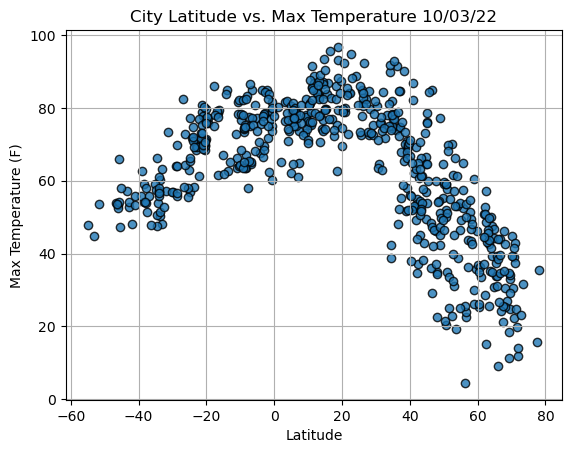

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

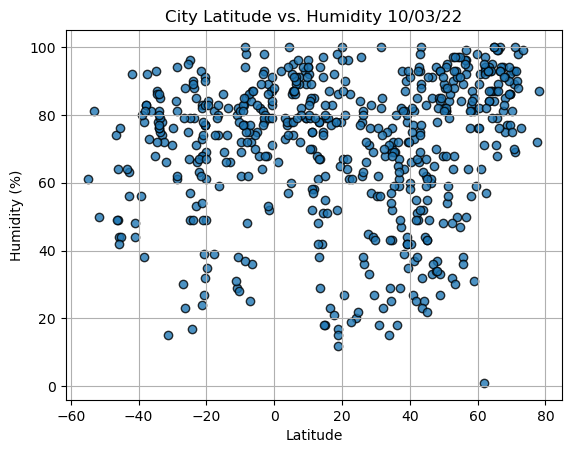

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

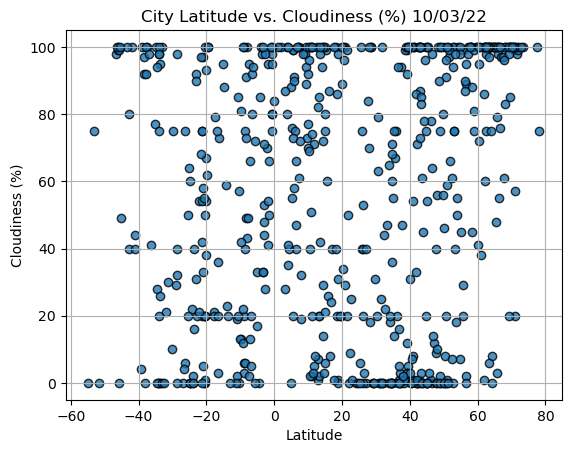

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

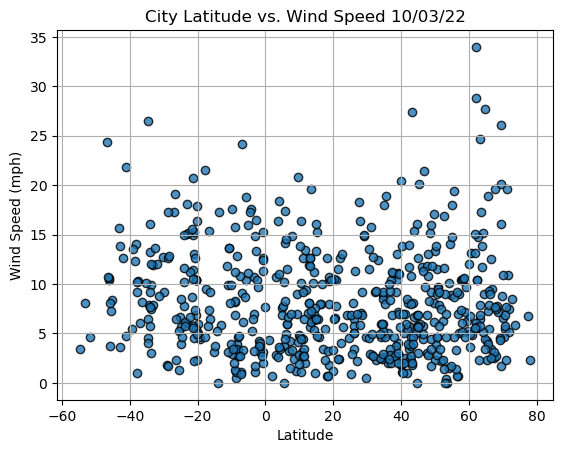

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [49]:
# Import linregress
from scipy.stats import linregress


# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [50]:
index13 = city_data_df.loc[13]
index13

City                        Bluff
Country                        NZ
Date          2022-10-03 22:42:54
Lat                         -46.6
Lng                      168.3333
Max Temp                     53.8
Humidity                       74
Cloudiness                     98
Wind Speed                  24.36
Name: 13, dtype: object

In [51]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lagoa,PT,2022-10-03 22:42:50,39.0500,-27.9833,69.13,78,99,4.03
1,Kibala,TD,2022-10-03 22:42:50,9.1104,18.3463,73.04,93,98,1.23
2,Kapaa,US,2022-10-03 22:42:51,22.0752,-159.3190,84.09,61,0,12.66
9,Port Antonio,JM,2022-10-03 22:42:53,18.1800,-76.4612,85.91,78,100,0.65
10,Langham,CA,2022-10-03 22:42:05,52.3668,-106.9679,70.02,32,61,6.29
...,...,...,...,...,...,...,...,...,...
585,Marshall,US,2022-10-03 22:54:26,34.3834,-86.3333,73.94,54,0,5.99
586,Iwanai,JP,2022-10-03 22:58:20,42.9744,140.5089,63.34,98,100,7.94
587,Bodden Town,KY,2022-10-03 22:58:20,19.2833,-81.2500,84.20,65,20,10.36
588,Taoudenni,ML,2022-10-03 22:58:21,22.6783,-3.9836,94.95,19,25,13.00


In [52]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

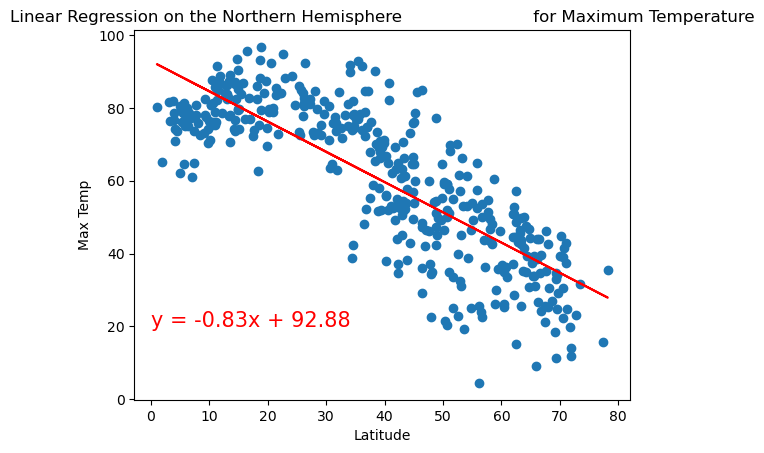

In [81]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,20))




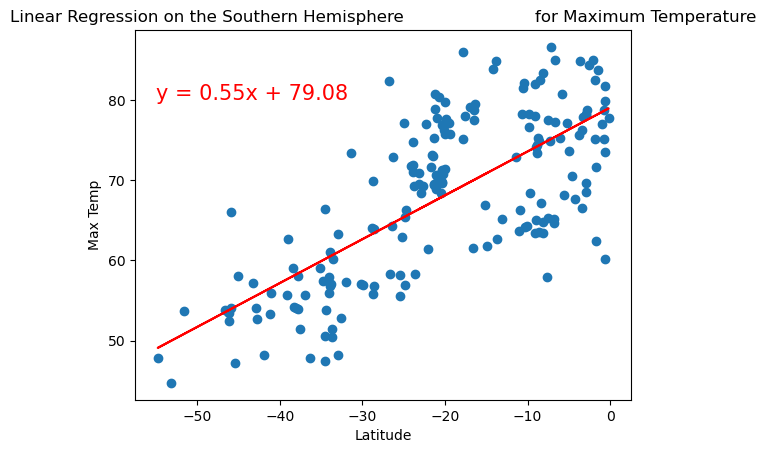

In [79]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55,80))

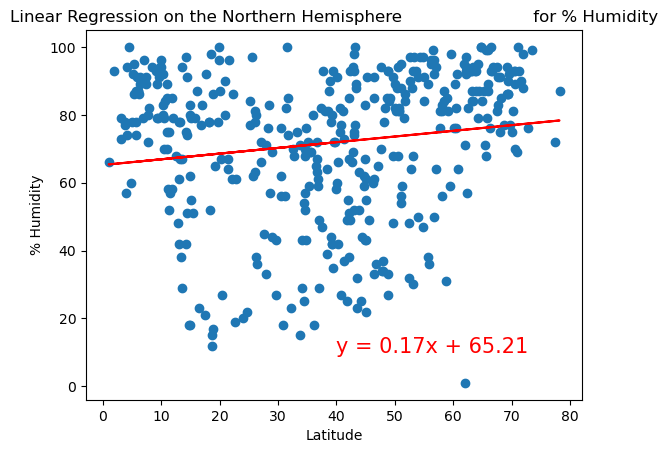

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

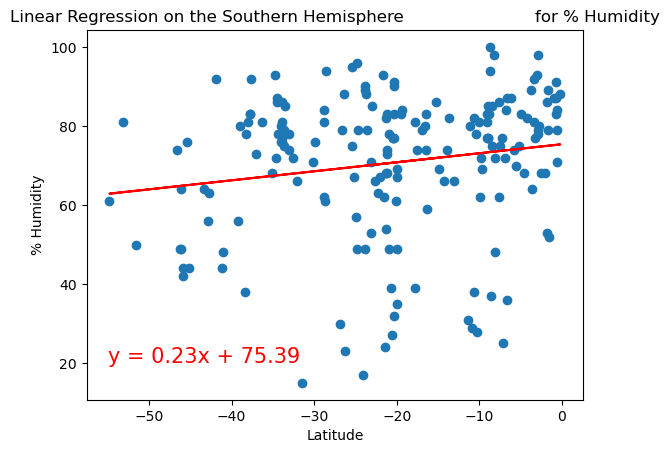

In [76]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-55,20))

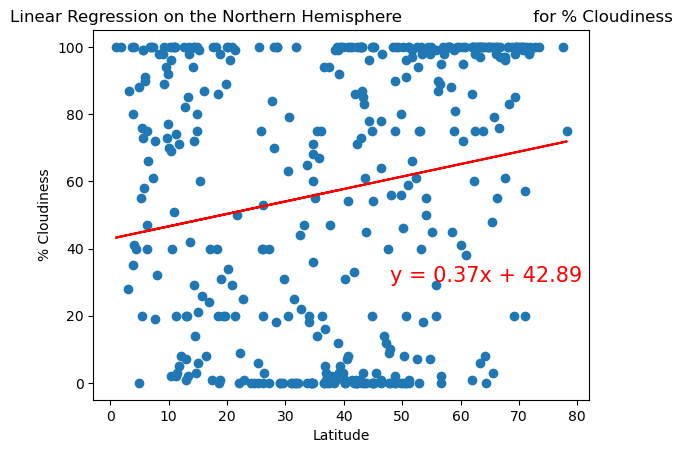

In [83]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(48,30))

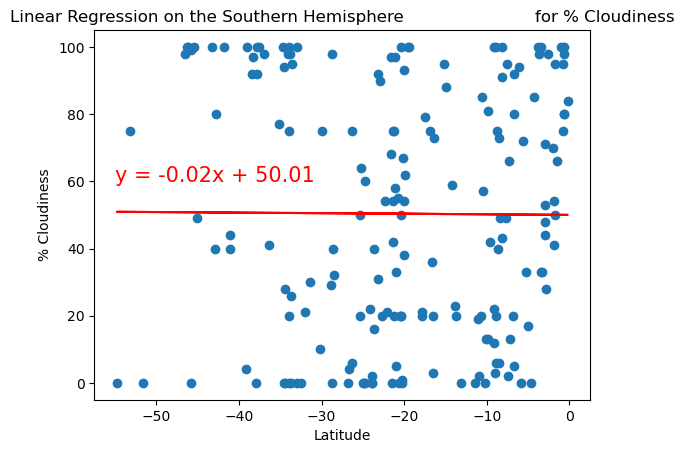

In [84]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-55,60))

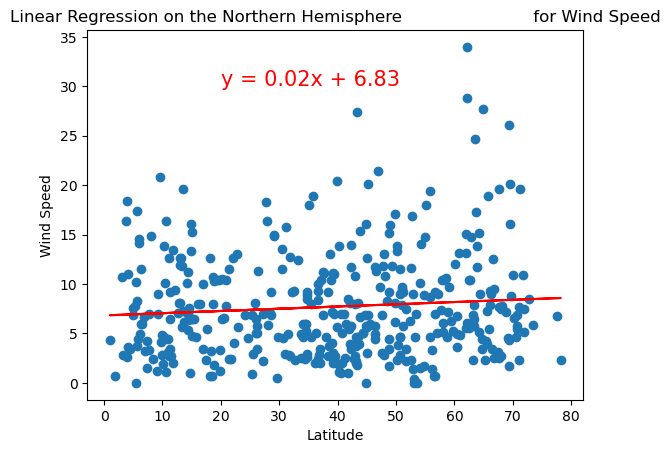

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(20,30))

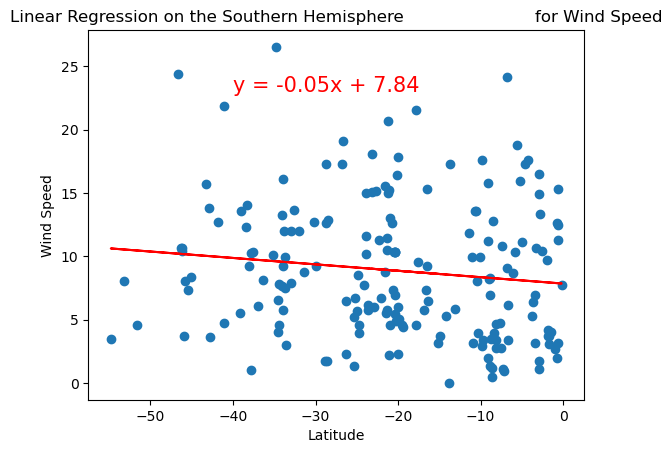

In [87]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-40,23))